In [196]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [197]:
NOISE_DEGREE = 0.3


def ds_permutation_to_noise_vae(item):
    image = item["image"]
    label = item["label"]
    print("image:", image)
    image = tf.cast(image, tf.float32)
    image = image / tf.reduce_max(image)
    white_noise = tf.random.uniform(tf.shape(image))
    noised_image = tf.clip_by_value(white_noise * NOISE_DEGREE + image, clip_value_min=0, clip_value_max=1)
    return noised_image, image

fashion_mnist = tfds.load("fashion_mnist")
train_ds = fashion_mnist["train"]
valid_ds = fashion_mnist["test"]

train_vae = train_ds.shuffle(10000).map(ds_permutation_to_noise_vae).batch(16)
valid_vae = valid_ds.shuffle(10000).map(ds_permutation_to_noise_vae).batch(1)



image: Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8)
image: Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8)


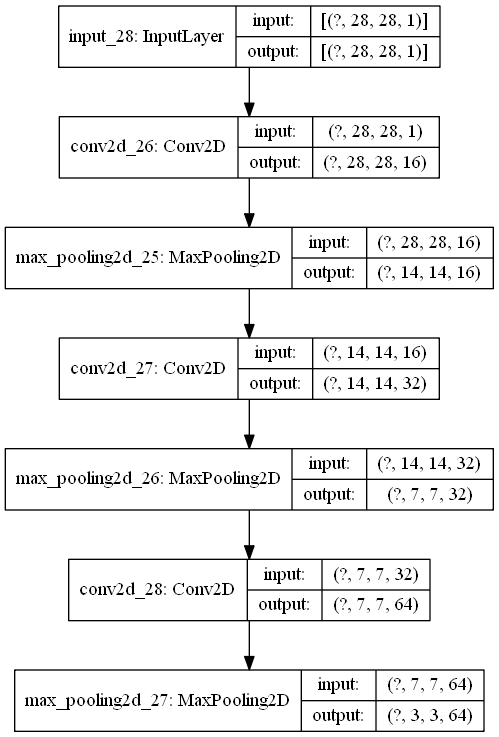

In [198]:
conv_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, strides=1, kernel_size=3, padding="same", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(32, strides=1, kernel_size=3, padding="same", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(64, strides=1, kernel_size=3, padding="same", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
])

tf.keras.utils.plot_model(conv_encoder, show_shapes = True)

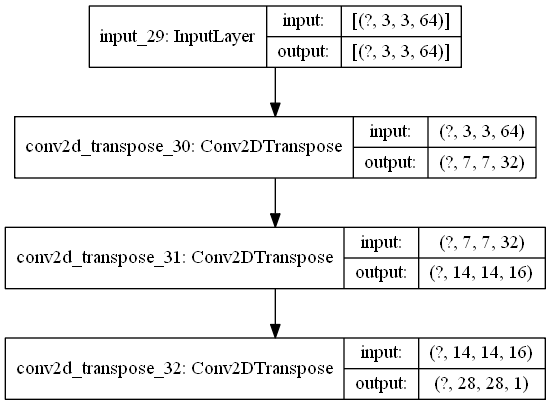

In [199]:
conv_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,3,64)),
    tf.keras.layers.Conv2DTranspose(32, strides=2, kernel_size=3, padding="valid", activation="selu"),
    tf.keras.layers.Conv2DTranspose(16, strides=2, kernel_size=3, padding="same", activation="selu"),
    tf.keras.layers.Conv2DTranspose(1, strides=2, kernel_size=3, padding="same", activation="sigmoid"),
])

tf.keras.utils.plot_model(conv_decoder, show_shapes = True)

In [200]:
autoencoder = tf.keras.models.Sequential([conv_encoder, conv_decoder])
# tf.keras.utils.plot_model(autoencoder, show_shapes=True, expand_nested=True)
# autoencoder.summary()
autoencoder.compile(loss="mse", optimizer="adam")

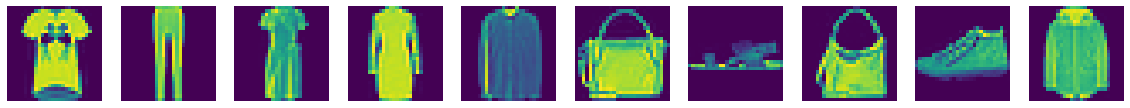

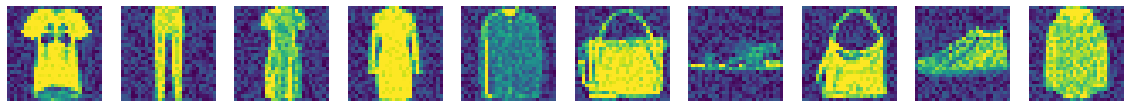

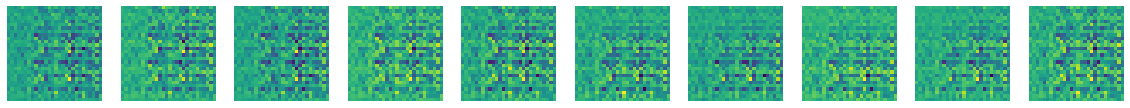

In [201]:
def display_images_row(images):
    columns = images.shape[0]
    for idx in range(columns):
        image = images[idx]
        plt.subplot(1, columns, idx + 1)
        plt.axis(False)
        plt.imshow(image)
        
def display_denoising_images():
    sample_arr = []
    src_images, gtruth_images = next(iter(valid_vae.batch(10)))
    src_images = tf.squeeze(src_images, axis=1)
    gtruth_images = tf.squeeze(gtruth_images, axis=1)
    predicted_images = autoencoder.predict(src_images)
    plt.figure(figsize=(20, 4))
    display_images_row(gtruth_images)
    plt.show()
    plt.figure(figsize=(20, 4))
    display_images_row(src_images)
    plt.show()
    plt.figure(figsize=(20, 4))
    display_images_row(predicted_images)
    plt.show()

display_denoising_images()


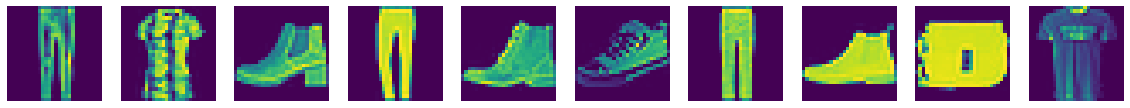

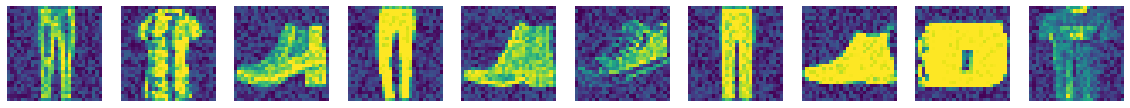

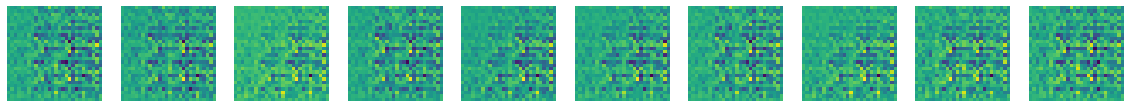

Epoch 1/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0142

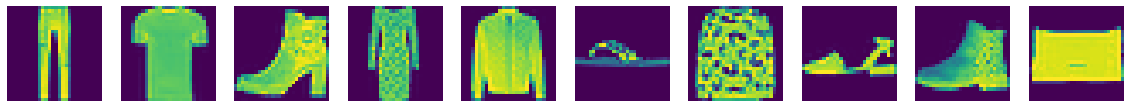

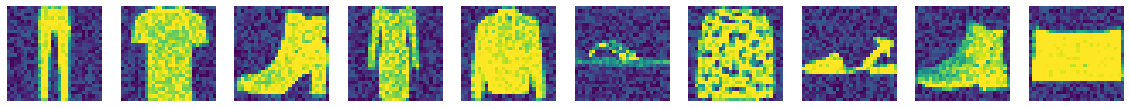

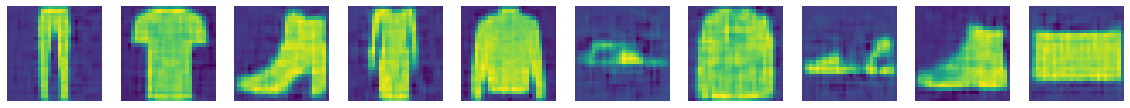

3750/3750 [==============================] - 62s 17ms/step - loss: 0.0142 - val_loss: 0.0095
Epoch 2/20
3750/3750 [==============================] - ETA: 0s - loss: 0.0086

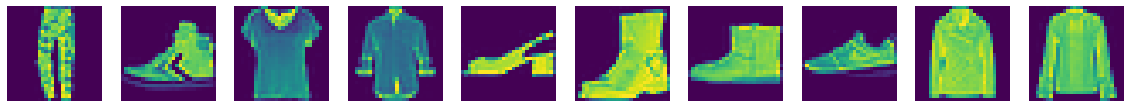

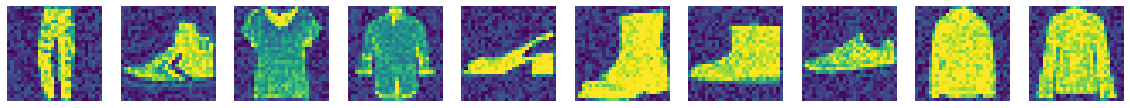

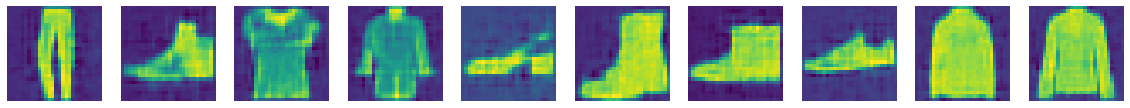

3750/3750 [==============================] - 63s 17ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 3/20
3747/3750 [============================>.] - ETA: 0s - loss: 0.0073- ETA: 1s - loss: 0. - ETA: 1s - loss: 0.007 - 

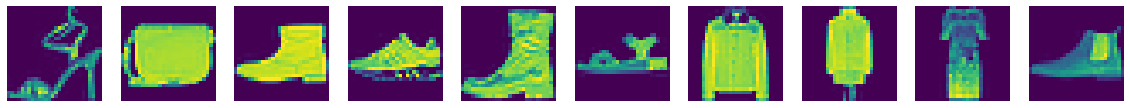

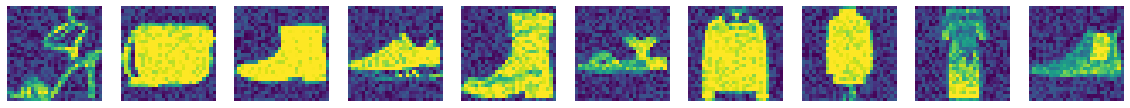

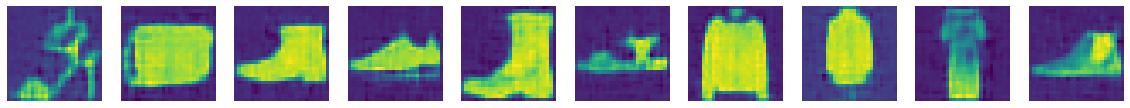

3750/3750 [==============================] - 71s 19ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 4/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0067

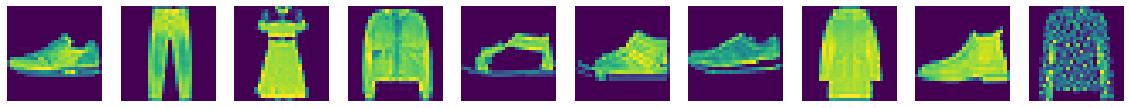

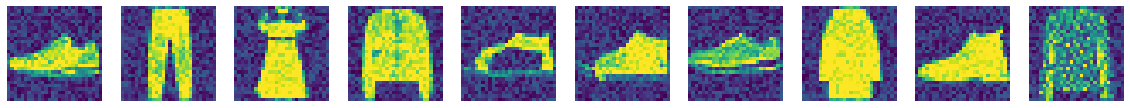

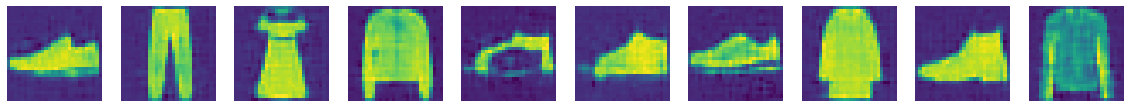

3750/3750 [==============================] - 72s 19ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 5/20
3748/3750 [============================>.] - ETA: 0s - loss: 0.0064

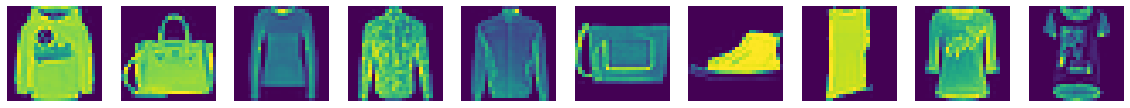

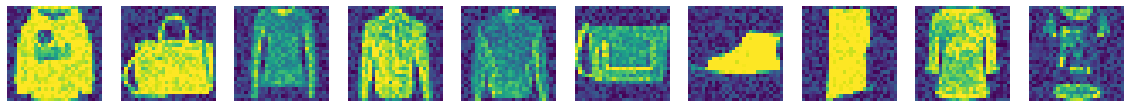

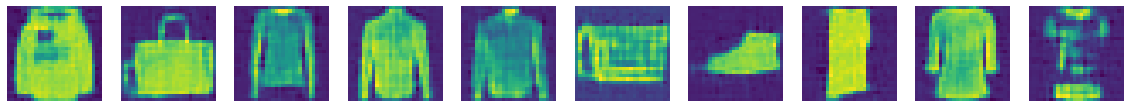

3750/3750 [==============================] - 71s 19ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 6/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0062

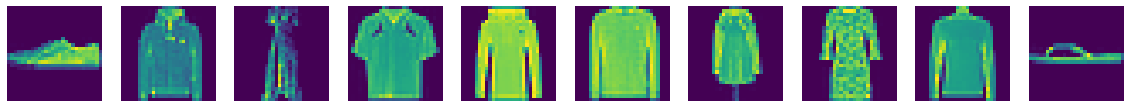

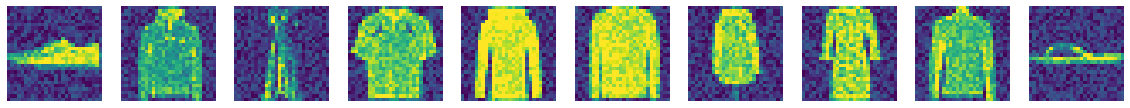

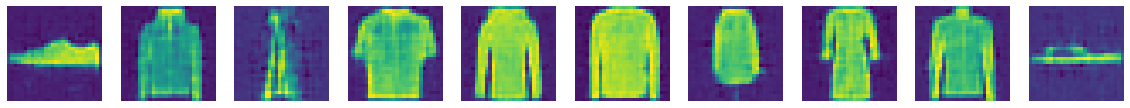

3750/3750 [==============================] - 71s 19ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 7/20
3747/3750 [============================>.] - ETA: 0s - loss: 0.0060

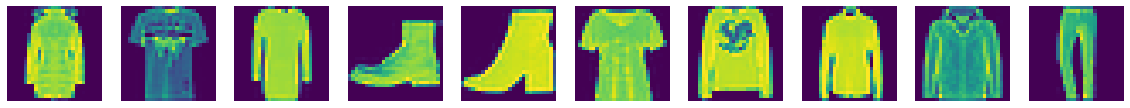

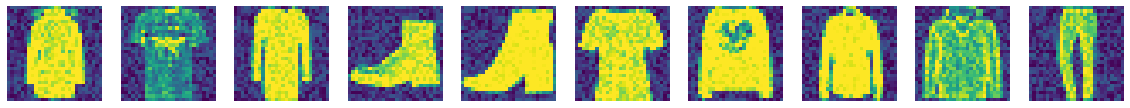

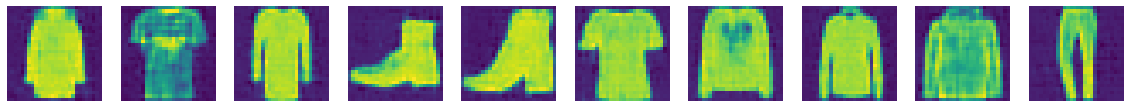

3750/3750 [==============================] - 68s 18ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 8/20
3750/3750 [==============================] - ETA: 0s - loss: 0.0059

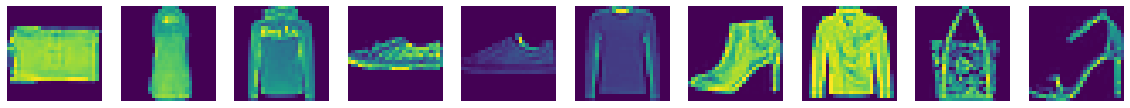

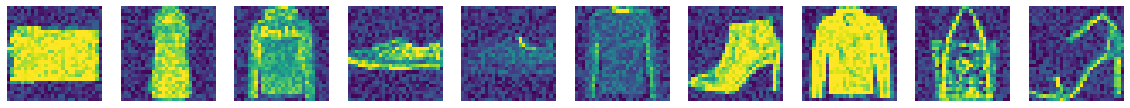

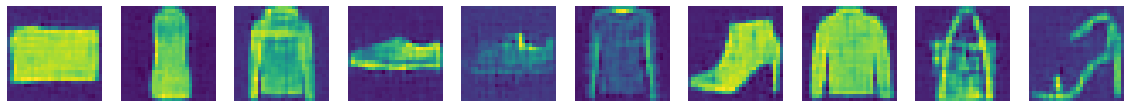

3750/3750 [==============================] - 72s 19ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/20
3750/3750 [==============================] - ETA: 0s - loss: 0.0058- ETA: 0s 

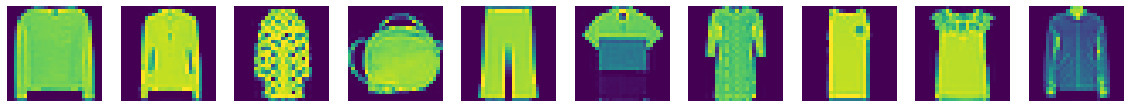

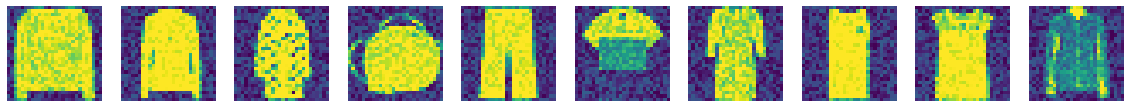

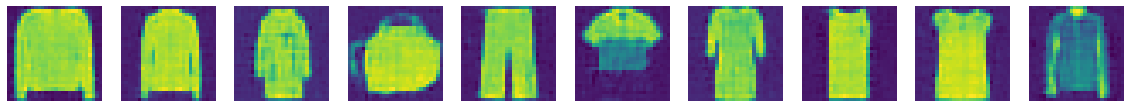

3750/3750 [==============================] - 67s 18ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 10/20
3748/3750 [============================>.] - ETA: 0s - loss: 0.0057

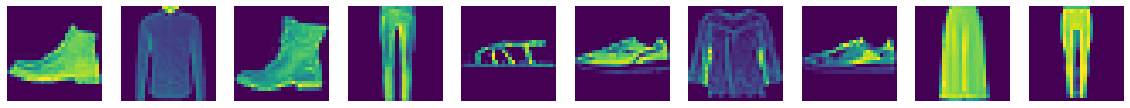

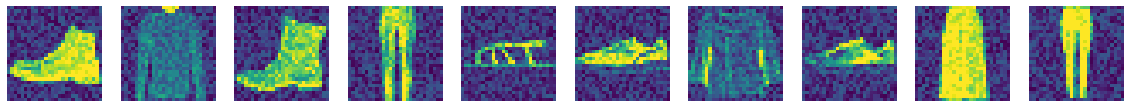

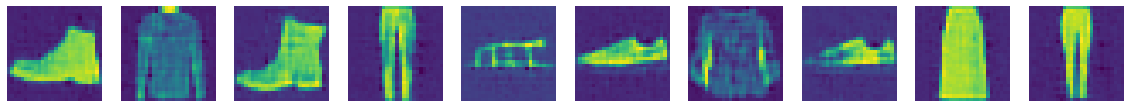

3750/3750 [==============================] - 71s 19ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 11/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0056

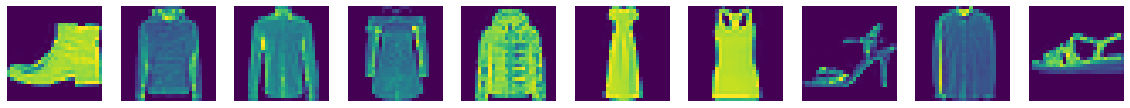

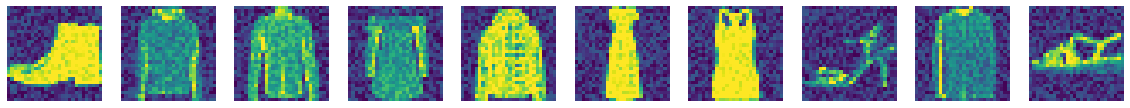

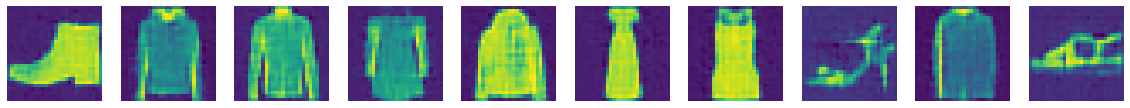

3750/3750 [==============================] - 89s 24ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 12/20
3748/3750 [============================>.] - ETA: 0s - loss: 0.0055

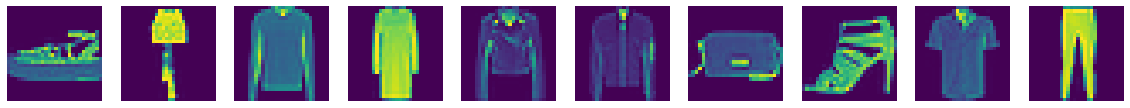

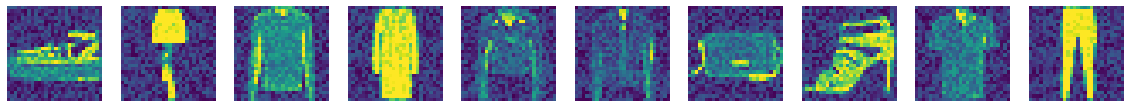

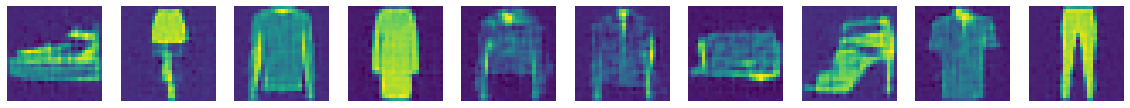

3750/3750 [==============================] - 87s 23ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 13/20
3747/3750 [============================>.] - ETA: 0s - loss: 0.0055-

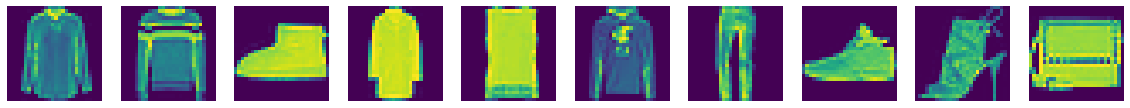

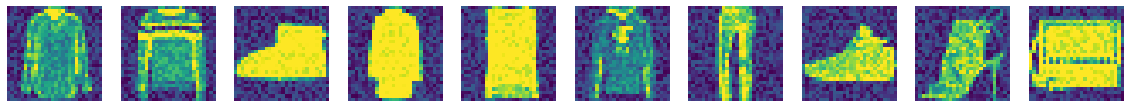

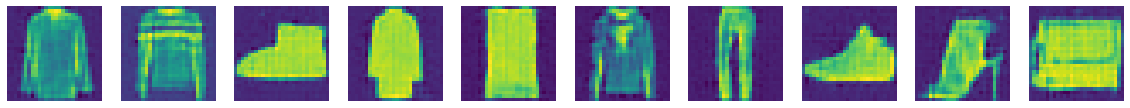

3750/3750 [==============================] - 82s 22ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 14/20
3747/3750 [============================>.] - ETA: 0s - loss: 0.0054

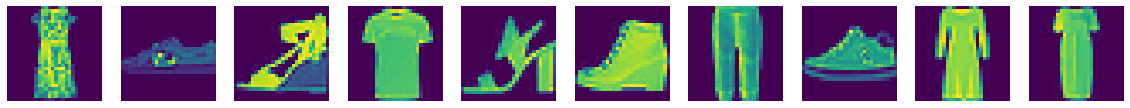

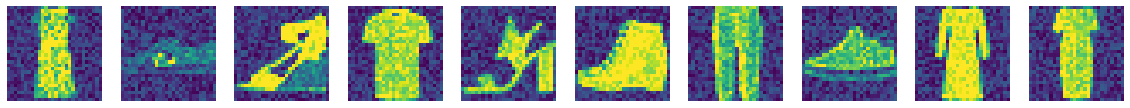

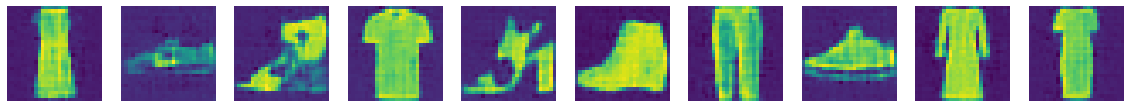

3750/3750 [==============================] - 70s 19ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 15/20
3748/3750 [============================>.] - ETA: 0s - loss: 0.0054- ETA: 0s - loss:

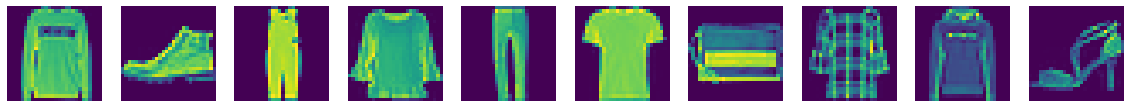

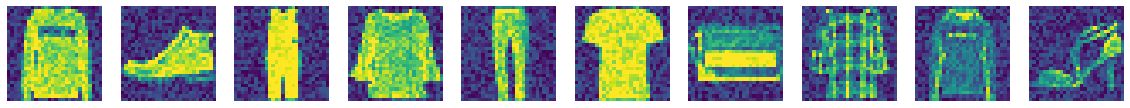

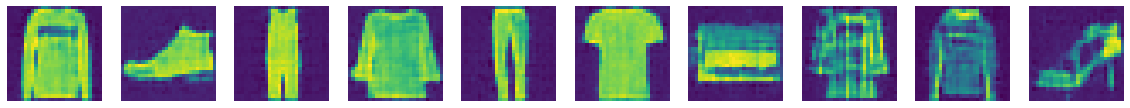

3750/3750 [==============================] - 73s 20ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 16/20
3748/3750 [============================>.] - ETA: 1s - loss: 0.0053

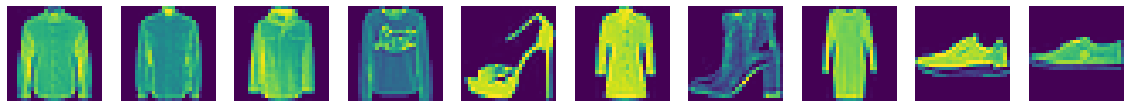

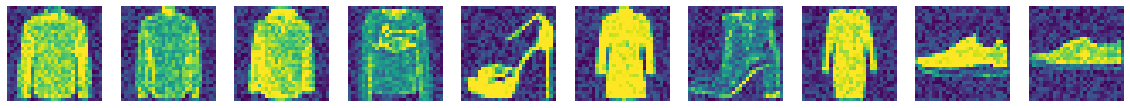

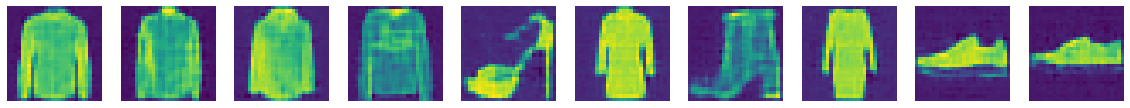

3750/3750 [==============================] - 2214s 590ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 17/20
3748/3750 [============================>.] - ETA: 0s - loss: 0.0053

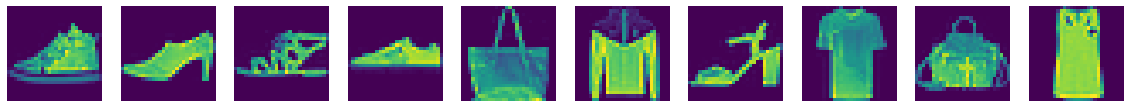

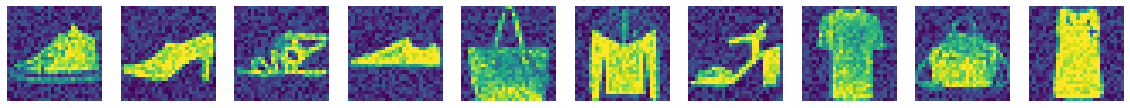

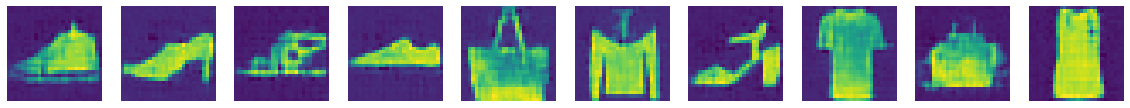

3750/3750 [==============================] - 65s 17ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 18/20
3750/3750 [==============================] - ETA: 0s - loss: 0.0052

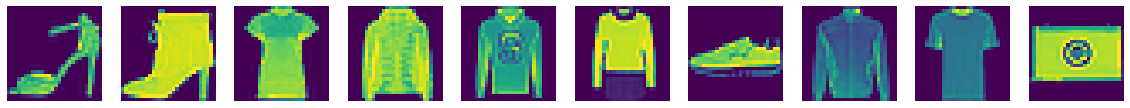

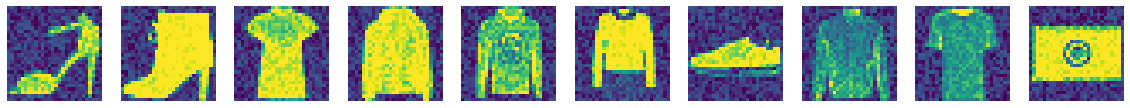

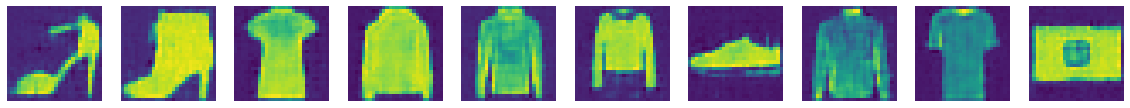

3750/3750 [==============================] - 59s 16ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 19/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0052

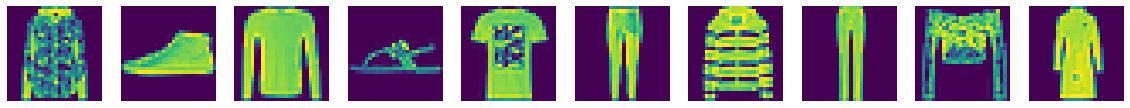

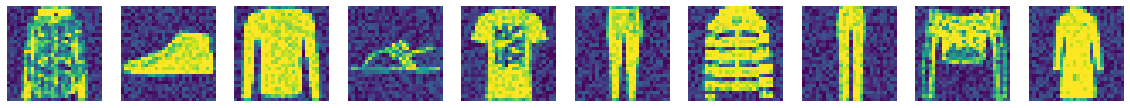

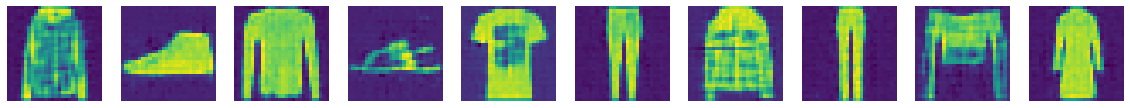

3750/3750 [==============================] - 59s 16ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 20/20
3749/3750 [============================>.] - ETA: 0s - loss: 0.0052

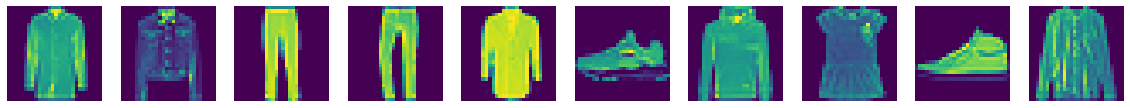

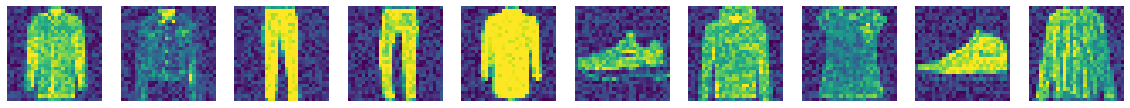

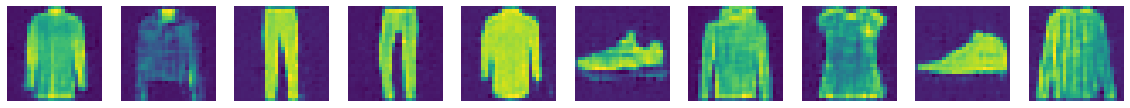

3750/3750 [==============================] - 60s 16ms/step - loss: 0.0052 - val_loss: 0.0051


In [202]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        display_denoising_images()
    def on_train_begin(self, epoch, logs=None):
        display_denoising_images()

EPOCHS=20
history = autoencoder.fit(train_vae, epochs=EPOCHS, validation_data=(valid_vae), callbacks=[CustomCallback()])

<AxesSubplot:>

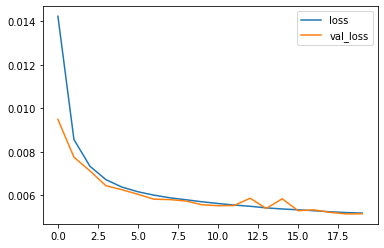

In [203]:
pd.DataFrame(history.history).plot()

In [204]:
def from_prebuild_to_regular_ds(item):
    return item["image"], item["label"]

clf_train_ds = train_ds.take(500).map(from_prebuild_to_regular_ds).batch(16)
clf_valid_ds = valid_ds.map(from_prebuild_to_regular_ds).batch(16)

# for idx, (img, label) in zip(range(1000), clipped_train_ds):
#     print(label.shape[0], end=" ")

---- pretrain network with weights()

In [205]:
conv_encoder_clone_1 = tf.keras.models.clone_model(conv_encoder)
conv_encoder_clone_1.set_weights(conv_encoder.get_weights())

clf_part_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,3,64)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="selu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


clf_model_w_pretrain = tf.keras.models.Sequential([conv_encoder_clone_1, clf_part_1])
clf_model_w_pretrain.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [206]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(epoch == EPOCHS):
            conv_encoder_clone_1.trainable = True
            print()
            print("make conv_encoder trainable")

conv_encoder_clone_1.trainable = False

history_pretrained = clf_model_w_pretrain.fit(clf_train_ds, epochs=EPOCHS * 2, validation_data=(clf_valid_ds), callbacks=[CustomCallback()])
# pd.DataFrame(history_pretrained.history).plot()

Epoch 1/40
32/32 [==============================] - 2s 76ms/step - loss: 1.8241e-04 - accuracy: 1.0000 - val_loss: 1.3995 - val_accuracy: 0.7693
Epoch 2/40
32/32 [==============================] - 3s 79ms/step - loss: 1.7860e-04 - accuracy: 1.0000 - val_loss: 1.4016 - val_accuracy: 0.7692
Epoch 3/40
32/32 [==============================] - 2s 63ms/step - loss: 1.7486e-04 - accuracy: 1.0000 - val_loss: 1.4037 - val_accuracy: 0.7695
Epoch 4/40
32/32 [==============================] - 2s 64ms/step - loss: 1.7123e-04 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7695
Epoch 5/40
32/32 [==============================] - 2s 64ms/step - loss: 1.6768e-04 - accuracy: 1.0000 - val_loss: 1.4080 - val_accuracy: 0.7696
Epoch 6/40
32/32 [==============================] - 2s 65ms/step - loss: 1.6421e-04 - accuracy: 1.0000 - val_loss: 1.4102 - val_accuracy: 0.7695
Epoch 7/40
32/32 [==============================] - 2s 70ms/step - loss: 1.6081e-04 - accuracy: 1.0000 - val_loss: 1.4123 - val_ac

(0.0, 2.0)

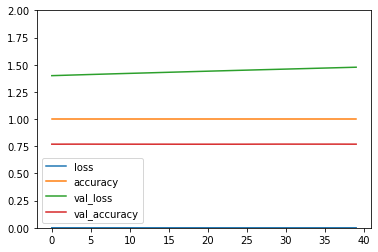

In [207]:
pd.DataFrame(history_pretrained.history).plot()
plt.ylim(0,2)

---- pretrain network W/O weights()

In [208]:
conv_encoder_clone_2 = tf.keras.models.clone_model(conv_encoder)
clf_part_2 = tf.keras.models.clone_model(clf_part)

clf_model_wo_pretrain = tf.keras.models.Sequential([conv_encoder_clone_2, clf_part_2])
clf_model_wo_pretrain.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [209]:
history_not_pretrained = clf_model_wo_pretrain.fit(clf_train_ds, epochs=EPOCHS, validation_data=(clf_valid_ds), callbacks=[CustomCallback()])

Epoch 1/20
32/32 [==============================] - 2s 68ms/step - loss: 5.1737 - accuracy: 0.2820 - val_loss: 1.6870 - val_accuracy: 0.4274
Epoch 2/20
32/32 [==============================] - 2s 68ms/step - loss: 1.2625 - accuracy: 0.5760 - val_loss: 1.2004 - val_accuracy: 0.6026
Epoch 3/20
32/32 [==============================] - 2s 64ms/step - loss: 0.8330 - accuracy: 0.7260 - val_loss: 0.9399 - val_accuracy: 0.7016
Epoch 4/20
32/32 [==============================] - 2s 68ms/step - loss: 0.5910 - accuracy: 0.8180 - val_loss: 0.9219 - val_accuracy: 0.7046
Epoch 5/20
32/32 [==============================] - 2s 69ms/step - loss: 0.4372 - accuracy: 0.8560 - val_loss: 0.8514 - val_accuracy: 0.7459
Epoch 6/20
32/32 [==============================] - 2s 68ms/step - loss: 0.3820 - accuracy: 0.8860 - val_loss: 0.8722 - val_accuracy: 0.7552
Epoch 7/20
32/32 [==============================] - 2s 70ms/step - loss: 0.2602 - accuracy: 0.9280 - val_loss: 1.0773 - val_accuracy: 0.7297
Epoch 8/20
32

(0.0, 2.0)

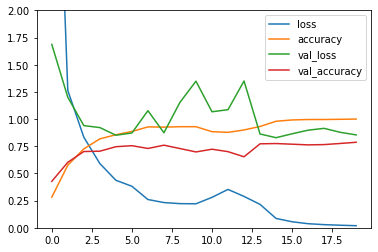

In [210]:
pd.DataFrame(history_not_pretrained.history).plot()
plt.ylim(0,2)